# **Membuat Model NLP dengan TensorFlow**
## Emotion Classification using NLP

## Profile

**Achmad Hadi Kurnia**

Link [Dicoding](https://www.dicoding.com/users/achmadhadikurnia)

## Kriteria
- [x] Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.
- [x] Harus menggunakan LSTM dalam arsitektur model.
- [x] Harus menggunakan model sequential.
- [x] Validation set sebesar 20% dari total dataset.
- [x] Harus menggunakan Embedding.
- [x] Harus menggunakan fungsi tokenizer.
- [x] Akurasi dari model minimal 75% pada train set dan validation set.

## Saran untuk Penilaian Lebih Tinggi
- [x] Akurasi dari model di atas 80%.
- [x] Mengimplementasikan callback.
- [x] Membuat plot loss dan akurasi pada saat training dan validation.

### 1. Setup Kebutuhan

In [1]:
# Unduh dataset
!wget https://raw.githubusercontent.com/achmadhadikurnia/emotion-classification-nlp-dicoding-submission/main/datasets/data.csv

# Impor libary
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

--2023-12-21 03:46:08--  https://raw.githubusercontent.com/achmadhadikurnia/emotion-classification-nlp-dicoding-submission/main/datasets/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658626 (1.6M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.58M  --.-KB/s    in 0.06s   

2023-12-21 03:46:08 (28.3 MB/s) - ‘data.csv’ saved [1658626/1658626]



### 2. Menyiapkan data

In [2]:
# Menampilkan mapping data
data = pd.read_csv('/content/data.csv', delimiter=',')
label = pd.get_dummies(data.label)
unique_labels = data['label'].unique()
size_unique_labels = len(unique_labels)
new_data = pd.concat([data, label], axis=1)
new_data = new_data.drop(columns=['label'])
new_data

,text,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


### 3. Tokenisasi dan Sequential

In [3]:
sentence = new_data['text'].values
label = new_data[unique_labels].values
sentence_latih, sentence_test, label_latih, label_test = train_test_split(sentence, label, test_size = 0.2)

# Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sentence_latih)
tokenizer.fit_on_texts(sentence_test)

sequences_latih = tokenizer.texts_to_sequences(sentence_latih)
sequences_test = tokenizer.texts_to_sequences(sentence_test)

padded_latih = pad_sequences(sequences_latih)
padded_test = pad_sequences(sequences_test)

# Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim = 5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(size_unique_labels, activation='softmax'),
])

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 117702 (459.77 KB)
Trainable params: 117702 (459.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. Modeling

In [14]:
# Callback
class accuracyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
      print('\nNilai akurasi telah mencapai 90%')
      self.model.stop_training = True

callbacks = accuracyCallback()

history = model.fit(
  padded_latih,
  label_latih,
  epochs=30,
  validation_data=(padded_test, label_test),
  verbose=2,
  callbacks=[callbacks],
)

Epoch 1/30
400/400 - 13s - loss: 0.0113 - accuracy: 0.9956 - val_loss: 0.6167 - val_accuracy: 0.8956 - 13s/epoch - 32ms/step
Epoch 2/30
400/400 - 13s - loss: 0.0129 - accuracy: 0.9949 - val_loss: 0.6319 - val_accuracy: 0.8972 - 13s/epoch - 33ms/step
Epoch 3/30
400/400 - 14s - loss: 0.0119 - accuracy: 0.9955 - val_loss: 0.6584 - val_accuracy: 0.8966 - 14s/epoch - 35ms/step
Epoch 4/30
400/400 - 13s - loss: 0.0103 - accuracy: 0.9956 - val_loss: 0.6736 - val_accuracy: 0.8997 - 13s/epoch - 32ms/step
Epoch 5/30
400/400 - 13s - loss: 0.0130 - accuracy: 0.9948 - val_loss: 0.5643 - val_accuracy: 0.8884 - 13s/epoch - 34ms/step
Epoch 6/30
400/400 - 12s - loss: 0.0143 - accuracy: 0.9948 - val_loss: 0.6263 - val_accuracy: 0.8984 - 12s/epoch - 31ms/step
Epoch 7/30
400/400 - 12s - loss: 0.0106 - accuracy: 0.9959 - val_loss: 0.7484 - val_accuracy: 0.8950 - 12s/epoch - 29ms/step
Epoch 8/30

Nilai akurasi telah mencapai 90%
400/400 - 12s - loss: 0.0098 - accuracy: 0.9962 - val_loss: 0.6425 - val_accurac

## 5. Plot

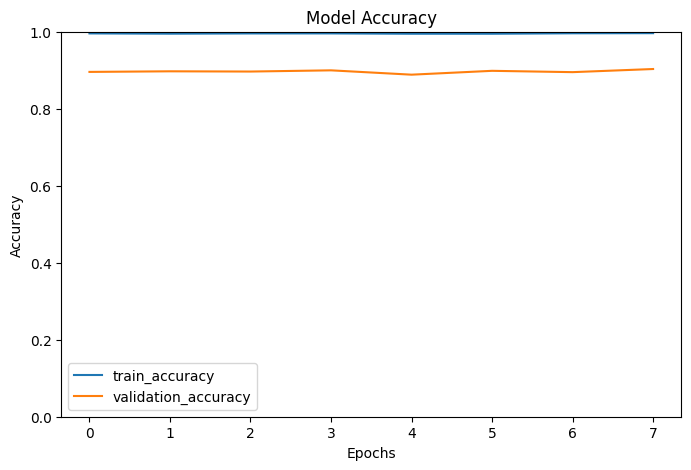

In [15]:
# Membuat plot model accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

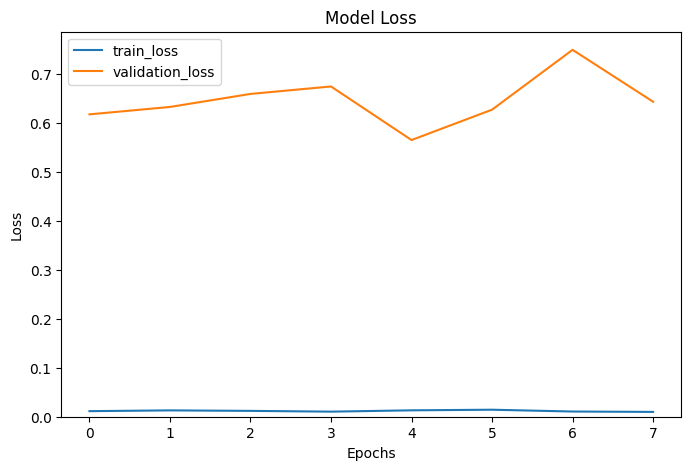

In [16]:
# Membuat plot model lost
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()